<a href="https://colab.research.google.com/github/PepiMartin28/Sea-Level-Predictor/blob/main/Sea_Level_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

Import the data

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/PepiMartin28/Sea-Level-Predictor/main/epa-sea-level.csv")

df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [3]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


We make a scatter plot to visualize the rise in the sea level through the years

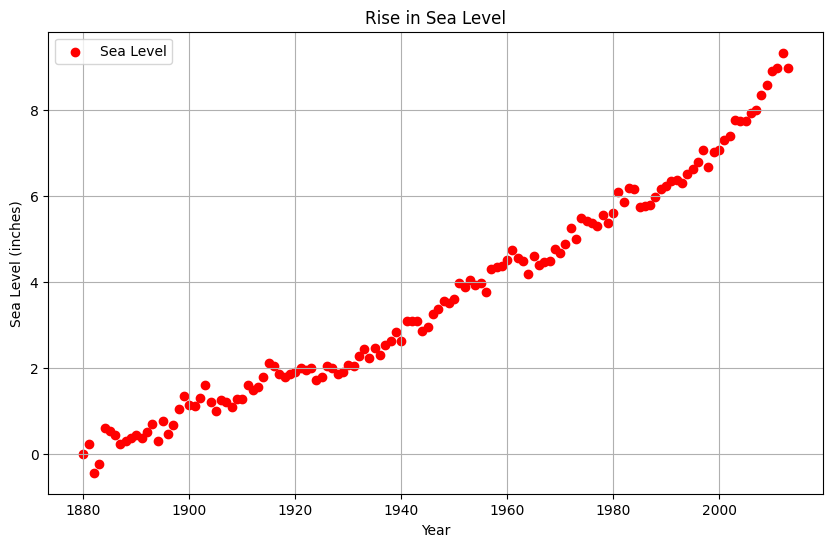

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Sea Level', color = "red")
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()

First we will predict sea level in 2050 using all the data we have

To obtain the prediction we will use scipy to get the slope and the intercept

In [8]:
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])

In [9]:
predicted_sea_level_2050 = slope * 2050 + intercept

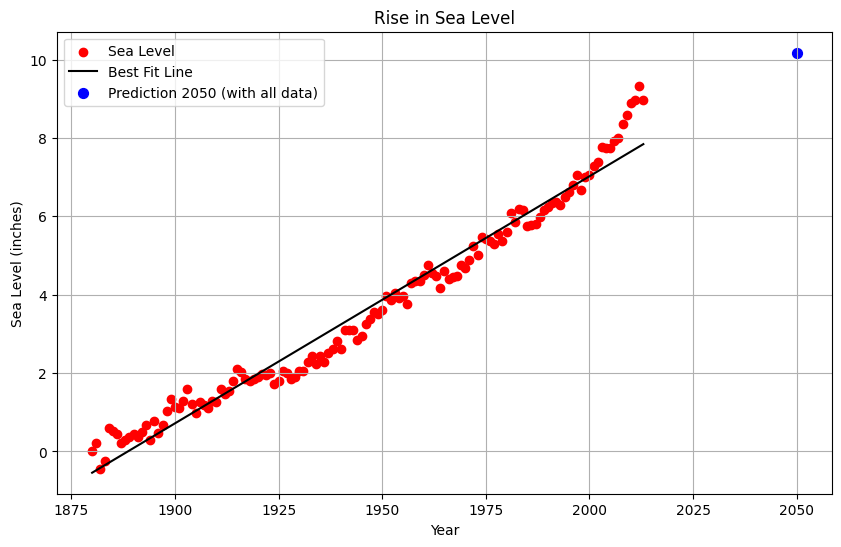

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Sea Level', color='red')

plt.plot(df['Year'], slope * df['Year'] + intercept, color='black', label='Best Fit Line')

plt.scatter(2050, predicted_sea_level_2050, color='blue', marker='o', s=50, label='Prediction 2050 (with all data)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()

Then we will predict sea level in 2050 using data since 2000

In [23]:
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df[df['Year']>= 2000]["Year"], df[df['Year']>= 2000]['CSIRO Adjusted Sea Level'])

In [24]:
predicted_sea_level_2050_2 = slope2 * 2050 + intercept2

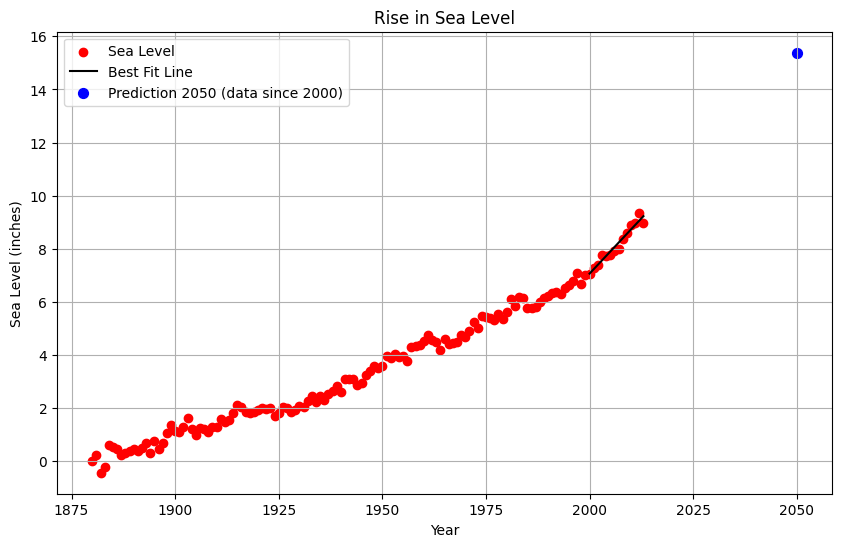

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Sea Level', color='red')

plt.plot(df[df['Year']>= 2000]['Year'], slope2 * df[df['Year']>= 2000]['Year'] + intercept2, color='black', label='Best Fit Line')

plt.scatter(2050, predicted_sea_level_2050_2, color='blue', marker='o', s=50, label='Prediction 2050 (data since 2000)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()

Finally we mix all the plots to see the differences

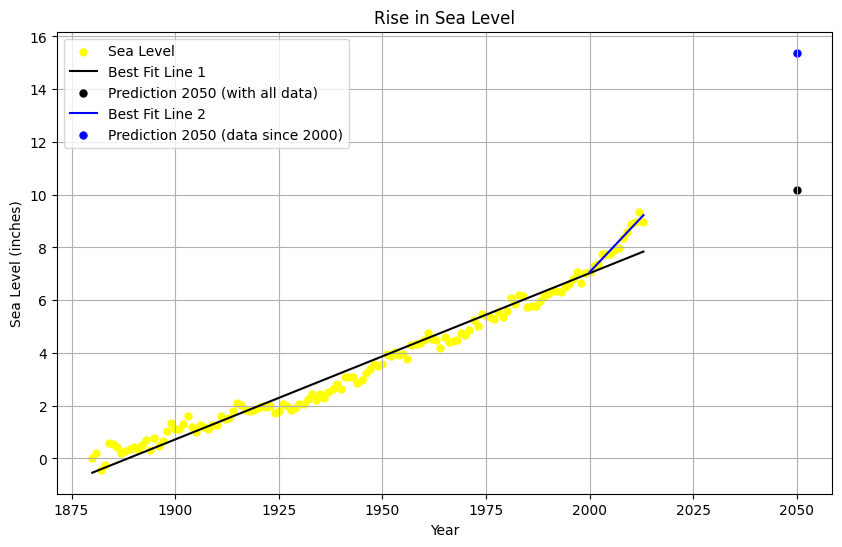

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], label='Sea Level', s=25, color='yellow')

plt.plot(df['Year'], slope * df['Year'] + intercept, color='black', label='Best Fit Line 1')

plt.scatter(2050, predicted_sea_level_2050, color='black', marker='o', s=25, label='Prediction 2050 (with all data)')

plt.plot(df[df['Year']>= 2000]['Year'], slope2 * df[df['Year']>= 2000]['Year'] + intercept2, color='blue', label='Best Fit Line 2')

plt.scatter(2050, predicted_sea_level_2050_2, color='blue', marker='o', s=25, label='Prediction 2050 (data since 2000)')

plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()
plt.grid(True)
plt.show()